37902 Foundation of Advanced Quantitative Marketing

Li Liu

2/9/2019

### Task
With the OJ data try to estimate the map under the continuous case.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
pd.options.display.max_colwidth = 1000

### OJ300_OnlyPurchases Data

In [51]:
df=pd.read_excel("OJ300_OnlyPurchases.xls")
df.describe()
df.head()

,panid,units,On,Sdate,Zon,A0_5,A6_18,A19_65,A65,Gen,...,price7,price8,br1,br2,br3,br4,br5,br6,br7,br8
0,2.0,1.0,0.0,15984.0,1.0,0.0,1.0,3.0,0.0,1.0,...,2.16,2.49,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5.0,1.0,0.0,15702.0,1.0,0.0,0.0,5.0,0.0,0.0,...,2.16,2.35,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5.0,1.0,0.0,15769.0,1.0,0.0,0.0,5.0,0.0,0.0,...,2.16,2.49,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,1.0,0.0,15800.0,2.0,0.0,0.0,5.0,0.0,0.0,...,2.22,2.19,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,2.0,0.0,15807.0,2.0,0.0,0.0,5.0,0.0,0.0,...,2.22,2.19,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Factors Structure Attributes

In [52]:
def crit(params,D,F,antithetic):
    '''
    Function computes the negative log likelihood of factor model
    
    Input:
    params (initial values)
    D (number of draws)
    F (number of factors)
    Antithetic (whether to have same amount of antithetic random draws)
    '''
    a1,a2,a3,a4,a5,a6,a7,bp,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7=params
    global tab, QGT

    if antithetic==False:
        wp=np.random.normal(0,1,D*F).reshape(F,D)
    else:
        a=np.random.normal(0,1,int((D/2))*F).reshape(F,int((D/2)))
        wp=np.concatenate((a,-a))
        
    A=np.matrix([[x1,y1],[x2,y2],[x3,y3],[x4,y4],[x5,y5],[x6,y6],[x7,0]])

    QGT=A@wp+np.array([a1,a2,a3,a4,a5,a6,a7]).reshape(7,1)
    ptab=pd.DataFrame({"ID":df["panid"]})
    for i in range(D):
        coef=QGT[:,i].tolist()
        ev1=np.exp(coef[0]+bp*df['price1'])
        ev2=np.exp(coef[1]+bp*df['price2'])
        ev3=np.exp(coef[2]+bp*df['price3'])
        ev4=np.exp(coef[3]+bp*df['price4'])
        ev5=np.exp(coef[4]+bp*df['price5'])
        ev6=np.exp(coef[5]+bp*df['price6'])
        ev7=np.exp(coef[6]+bp*df['price7'])
        ev8=np.exp(bp*df['price8'])

        denom=ev1+ev2+ev3+ev4+ev5+ev6+ev7+ev8
        ptab[i]=(ev1*df['br1']+ev2*df['br2']+ev3*df['br3']+ev4*df['br4']+\
                 ev5*df['br5']+ev6*df['br6']+ev7*df['br7']+ev8*df['br8'])/denom

    tab=ptab.groupby("ID").prod()
    tab["avg"]=tab.mean(axis=1)
    tab["LL"]=np.log(tab["avg"])
    LL=np.sum(tab["LL"])
    
    return -LL

In [53]:
para_init=[-3, -4, -2, 1, -0.5, -1, -3, -2, -1, 9, -2, 6, 3, -4, 5, 5, 3, -1, 1, 4, -1]
args=(10,2,False)
results10 = opt.minimize(crit, para_init,args,tol=1e-20, method='L-BFGS-B')

In [54]:
a1,a2,a3,a4,a5,a6,a7,bp,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7=results10.x

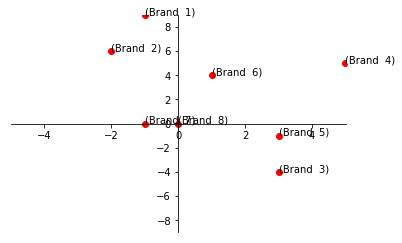

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x = [x1,x2,x3,x4,x5,x6,x7,0]
y = [y1,y2,y3,y4,y5,y6,0,0]
plt.plot(x, y, 'ro')
plt.axis([-5,5,-9,9])
for i_x, i_y in zip(x, y):
    plt.text(i_x, i_y, '(Brand  {})'.format(x.index(i_x)+1))

plt.show()